# 1-D Diffusivity

## Imports

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; 
sns.set_style("white")
import matplotlib.cm as cm

%matplotlib inline

## Parameters

In [5]:
phi = 0.2
mu = 0.4
c_t = 3e-6
k = 2000
L = 1000

In [6]:
k / (phi * mu * c_t)

8333333333.333332

### Convert Units

In [7]:
# psiI = 6897 # Pa-1
# ft = 3.28 # m
# Pa_s = 1000 # cp
# psi = 1.45 * 10**-4 # Pa
# md = 1.01 * 10**15 # m2

In [8]:
# k = k / md
# c_t = c_t / psiI
# mu = mu / Pa_s

In [9]:
def to_SI_units(mu, c_t, k):
    k = k / (1.01 * 10**15)
    c_t = c_t / 6897
    mu = mu / 1000
    return mu, c_t, k

In [10]:
mu, c_t, k = to_SI_units(mu, c_t, k)

In [11]:
constant = k / (phi * mu * c_t)
constant = constant * 3.28**2 # ft^2/s

In [12]:
print(f'Constant in () Units {round(constant, 2)}')

Constant in () Units 612.22


## Initial and Boundary Conditions

In [13]:
P_L = 5000
P_R = 2000
P_initial = 5000

In [14]:
num_x = 1000
num_t = 1000

## Analytical solution

### Transient Pressure

In [15]:
def fourier_series(num_terms, constant, x, t, L):  
    
    fourierSum = 0  
    for n in range(1, num_terms):
        exp_term = (n**2 * np.pi**2 * constant * t) / L**2
        series_term = 1/n * np.exp(-exp_term) * np.sin(n * np.pi * x / L)
        fourierSum += series_term
                
    return fourierSum

In [16]:
def pressure_profile(x, t, *args):
    constant = args[0]
    num_terms = args[1]
    
    fourier_sum = fourier_series(num_terms, constant, x, t, L)
    total = (x / L) + (2 / np.pi) * fourier_sum
    result = P_L + (P_R - P_L)* total
    return result

### Steady State Pressure

In [17]:
def steady_state(x, L):
    return P_L + (P_R - P_L) * x / L

## Pressure Profile 

### Discrete Time Points

In [22]:
def plot_pressure_profile(num_time_steps, L, nx, nt, constant, num_fourier_terms):
    params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
    plt.rcParams.update(params)
    X = np.linspace(0, L, nx)
    
    plt.figure(figsize= (10, 10))
    plt.title("Pressure Profile w.r.t X", color = 'white')
    plt.xlabel('X')
    plt.ylabel('P')
    plt.ylim([1800, 5200])
    for t in range(1, num_time_steps, 79):
        T = np.linspace(t, t, nt)
        p = pressure_profile(X, T, constant, num_fourier_terms)
        sns.lineplot(X, p, dashes=True, label = f't = {t}')
        
    plt.legend()
    plt.text(500, 3500, "Steady State", color ='white')
    plt.text(50, 3000, "Transient State", color ='white')
    plt.plot([0, L], [P_L, P_L], '--', c = 'g', linewidth=2.0)
    plt.plot([0, L], [P_R, P_R], '--', c = 'r', linewidth=2.0)
    plt.savefig('./images/pressure_profile.png', transparent = True, dpi = 1200)

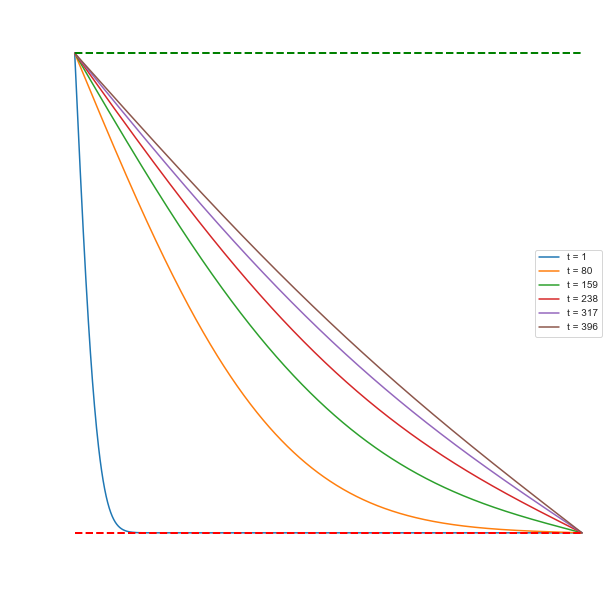

In [23]:
plot_pressure_profile(400, L, 1000, 1000, constant, 50) 

### Continuous Time Points

In [20]:
x = np.linspace(0, L, 1500)
t = np.linspace(0, 600, 1000)

In [21]:
X, T = np.meshgrid(x, t)

In [22]:
p = pressure_profile(X, T, constant, 50)

In [23]:
def plot_pressure_mesh(p, X, T):
    plt.figure(figsize = (8, 8))
    plt.title('Pressure Profile w.r.t X at time t')
    plt.xlabel('X')
    plt.ylabel('P')
    
    for index in range(1, len(p), 50):
        plt.plot(X[index], p[index])

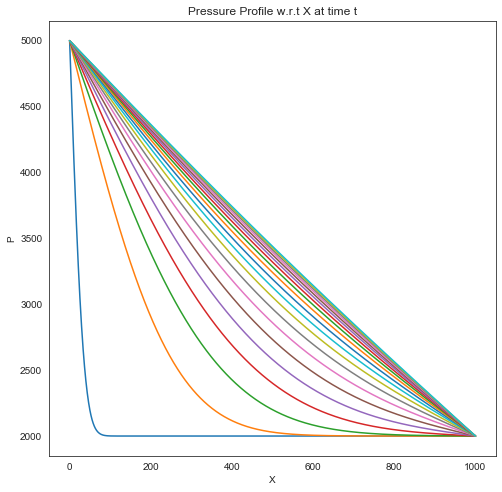

In [24]:
plot_pressure_mesh(p, X, T)

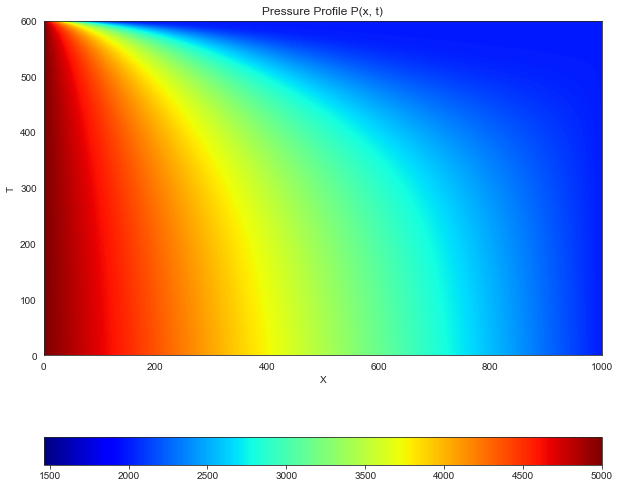

In [25]:
plt.figure(figsize = (10, 10))
plt.imshow(p, cmap = 'jet', extent = [0, 1000, 0, 600])
plt.ylabel('T')
plt.xlabel('X')
plt.title('Pressure Profile P(x, t)')
plt.colorbar(orientation = 'horizontal');

## Export / Save Data

In [26]:
# df_dict = {
#     'X': X.flatten(),
#     'T': T.flatten(),
#     'psol': p.flatten()
# }

In [27]:
# df = pd.DataFrame({'X': x})
# df.to_csv('./data/1D_Diffusivity_x', index = False );

In [28]:
# df = pd.DataFrame({'T': t})
# df.to_csv('./data/1D_Diffusivity_t', index = False );

In [29]:
# df = pd.DataFrame({'psol': p.flatten()})
# df.to_csv('./data/1D_Diffusivity_psol', index = False );

In [30]:
# df = pd.DataFrame.from_records(df_dict)

In [31]:
# df.to_csv('./data/1D_Diffusivity', index = False );

## Edit - Fluid Flow Equations

In [32]:
P_L = 5000
P_R = 2000

In [33]:
phi = 0.2
mu = 0.4
c_t = 3e-06
k = 2000 #md
L = 1000

In [34]:
psiI = 6897 # Pa-1
ft = 3.28 # m
Pa_s = 1000 # cp
psi = 1.45 * 10**-4 # Pa
md = 1.01 * 10**15 # m2

In [35]:
def to_SI_units(mu, c_t, k):
    k = k / (1.01 * 10**15)
    c_t = c_t / 6897
    mu = mu / 1000
    return mu, c_t, k

In [36]:
mu, c_t, k = to_SI_units(mu, c_t, k)

In [1]:
alpha = ((mu * phi * c_t) / k) * ft**2
alpha = 1 / alpha
alpha

NameError: name 'mu' is not defined

In [38]:
x = np.linspace(0, L, 1000)
t = np.linspace(0, 600, 1000)

In [39]:
X, T = np.meshgrid(x, t)

In [40]:
def fourier_series(num_terms, constant, x, t, L):  
    
    fourierSum = 0  
    for n in range(1, num_terms):
        exp_term = (n**2 * np.pi**2 * constant * t) / L**2
        series_term = 1/n * np.exp(-exp_term) * np.sin(n * np.pi * x / L)
        fourierSum += series_term
                
    return fourierSum

In [41]:
def pressure_profile(x, t, *args):
    constant = args[0]
    num_terms = args[1]
    
    fourier_sum = fourier_series(num_terms, constant, x, t, L)
    total = (x / L) + (2 / np.pi) * fourier_sum
    result = P_L + (P_R - P_L)* total
    return result

In [42]:
p = pressure_profile(X, T, alpha, 50)

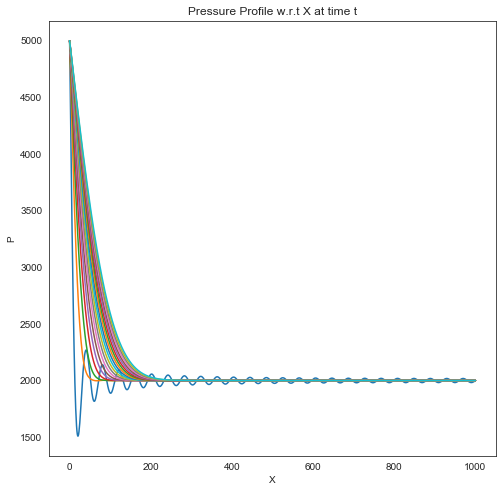

In [43]:
plot_pressure_mesh(p, X, T)

<img src="./equation.png" />

In [44]:
def exp_term(n, t_d):
    constant = -((2*n + 1)**2)/4
    inner =  constant * (np.pi**2) * t_d
    return np.exp(inner)

In [45]:
def sine_term(n, x_d):
    constant = ((2*n + 1) * np.pi) /2
    inner = constant * x_d
    return np.sin(inner)

In [46]:
def fourier_series_expansion(n, t_d, x_d):
    total_sum = 0
    
    for i in range(1, n):
        constant = 4 / ((2*n + 1) * np.pi)
        f = constant * exp_term(n, t_d) * sine_term(n, x_d)
        total_sum += f
    return total_sum

In [47]:
def dimensionless_vars(x, t, alpha):
    x_d = x / L
    t_d = (alpha * t) / (L**2)
    return x_d, t_d

In [48]:
def pressure_profile(x, t, n):
    X, T = np.meshgrid(x, t)
    x_d, t_d = dimensionless_vars(X, T, alpha)
    return P_L + (P_R - P_L) * fourier_series_expansion(n, t_d, x_d)

In [49]:
p = pressure_profile(x, t, 50)

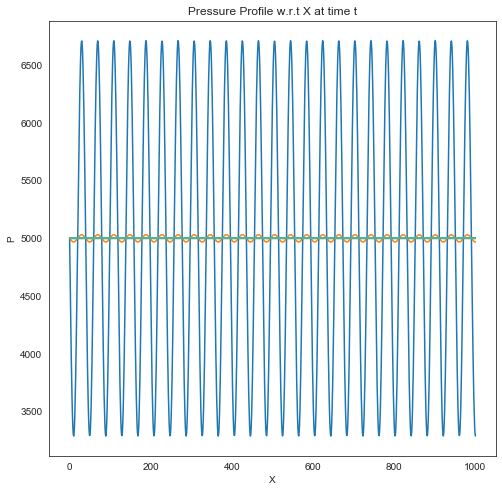

In [50]:
plot_pressure_mesh(p, X, T)